Saving MESSSII.jpg to MESSSII.jpg


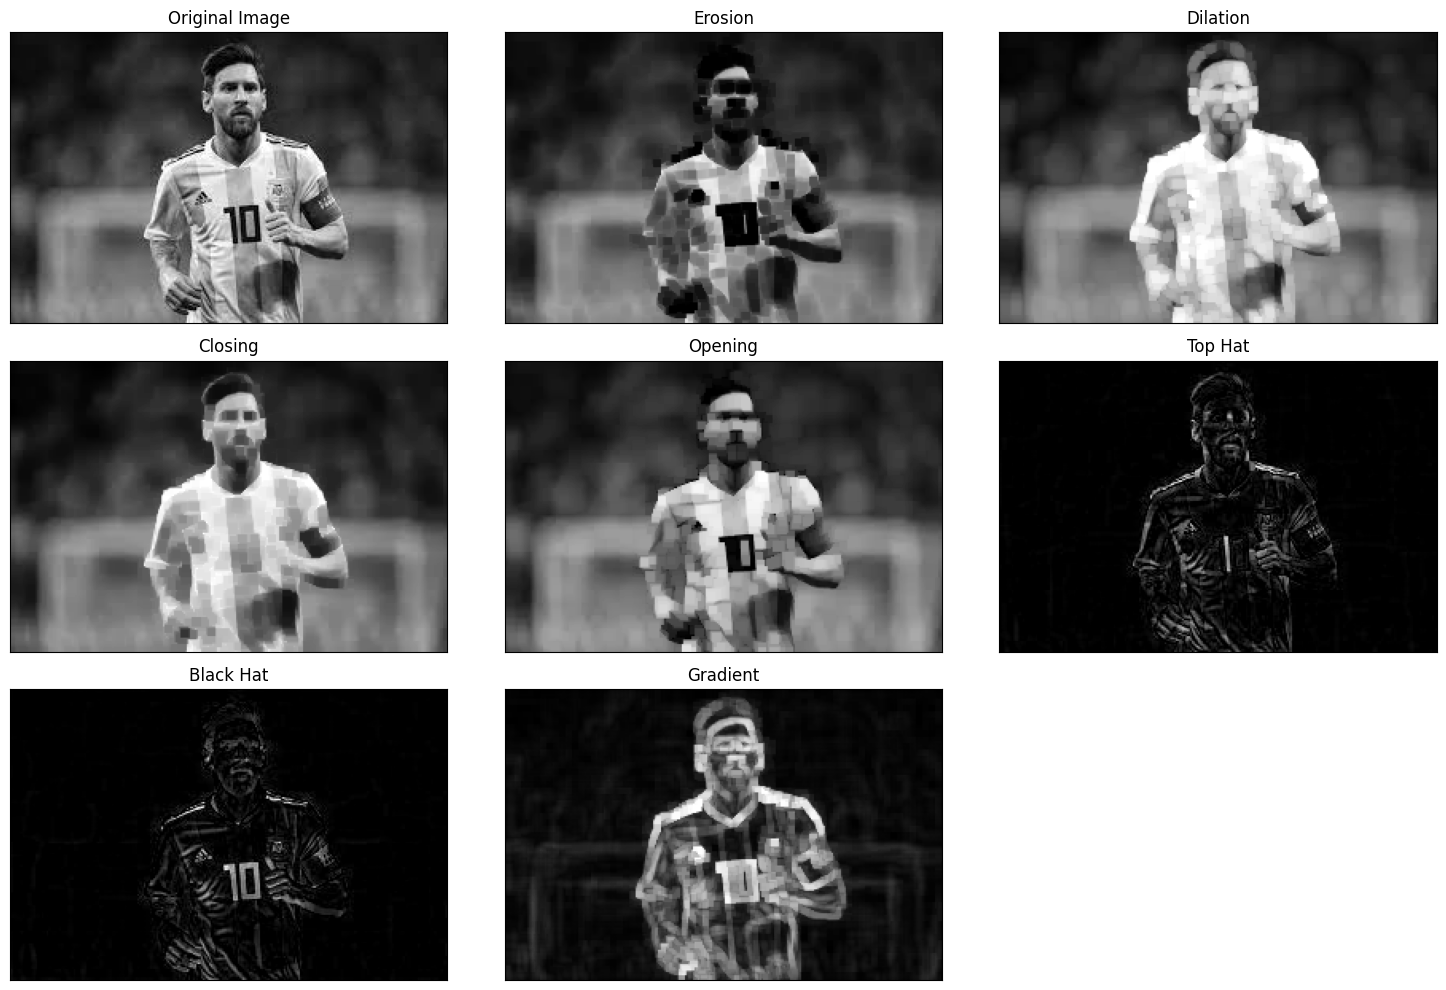

In [ ]:

# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload image to Colab environment
from google.colab import files
uploaded = files.upload()

# Replace 'image_path' with the uploaded file's path
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define kernel
kernel = np.ones((5,5), np.uint8)

# Perform morphological operations
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=1)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
black_hat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# Display images
titles = ['Original Image', 'Erosion', 'Dilation', 'Closing', 'Opening', 'Top Hat', 'Black Hat', 'Gradient']
images = [image, erosion, dilation, closing, opening, top_hat, black_hat, gradient]

plt.figure(figsize=(15, 10))
for i in range(8):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


# image processing using openCV

<ipython-input-6-d6c59e723186>:79: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 5), plt.imshow(img_prewitt, cmap='gray')
<ipython-input-6-d6c59e723186>:83: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, 7), plt.imshow(output, cmap='gray')


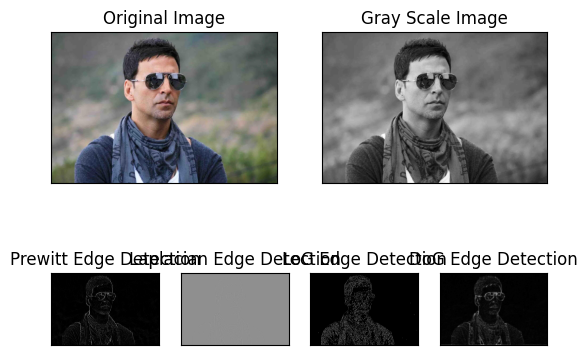

In [ ]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Read the image
img_path = "/content/hero.jpg"
img = cv2.imread(img_path)
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0)

# Canny Edge Detection
img_canny = cv2.Canny(img, 100, 200)

# Sobel Edge Detection
img_sobelx = cv2.Sobel(img_gaussian, cv2.CV_8U, 1, 0, ksize=5)
img_sobely = cv2.Sobel(img_gaussian, cv2.CV_8U, 0, 1, ksize=5)
img_sobel = img_sobelx + img_sobely

# Prewitt Edge Detection
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

# Laplacian (Second Order Derivation)
laplacian = cv2.Laplacian(img_gaussian, cv2.CV_64F)

# LoG (Laplacian of Gaussian)
import scipy.ndimage as nd

LoG = nd.gaussian_laplace(gray, 2)
thres = np.absolute(LoG).mean() * 0.75
output = np.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if p > 0:
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if (maxP - minP) > thres and zeroCross:
            output[y, x] = 1

# DoG (Difference of Gaussian)
A = np.array([[0, 0, -1, -1, -1, 0, 0],
              [0, -2, -3, -3, -3, -2, 0],
              [-1, -3, 5, 5, 5, -3, -1],
              [-1, -3, 5, 16, 5, -3, -1],
              [-1, -3, 5, 5, 5, -3, -1],
              [0, -2, -3, -3, -3, -2, 0],
              [0, 0, -1, -1, -1, 0, 0]], dtype=np.float32)

ratio = gray.shape[0] / 500.0
new_width = int(gray.shape[1] / ratio)
nimg = cv2.resize(gray, (new_width, 500))
I1 = signal.convolve2d(nimg, A, mode='same')
I1 = np.absolute(I1)
I1 = (I1 - np.min(I1)) / float(np.max(I1) - np.min(I1))
I2 = cv2.GaussianBlur(I1, (5, 5), 0)

# Plotting
plt.subplot(2, 2, 1), plt.imshow(original_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(gray, cmap='gray')
plt.title('Gray Scale Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(img_canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(img_sobel, cmap='gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 5), plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 6), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 7), plt.imshow(output, cmap='gray')
plt.title('LoG Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 4, 8), plt.imshow(I2, cmap='gray')
plt.title('DoG Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

image transform 1 hist


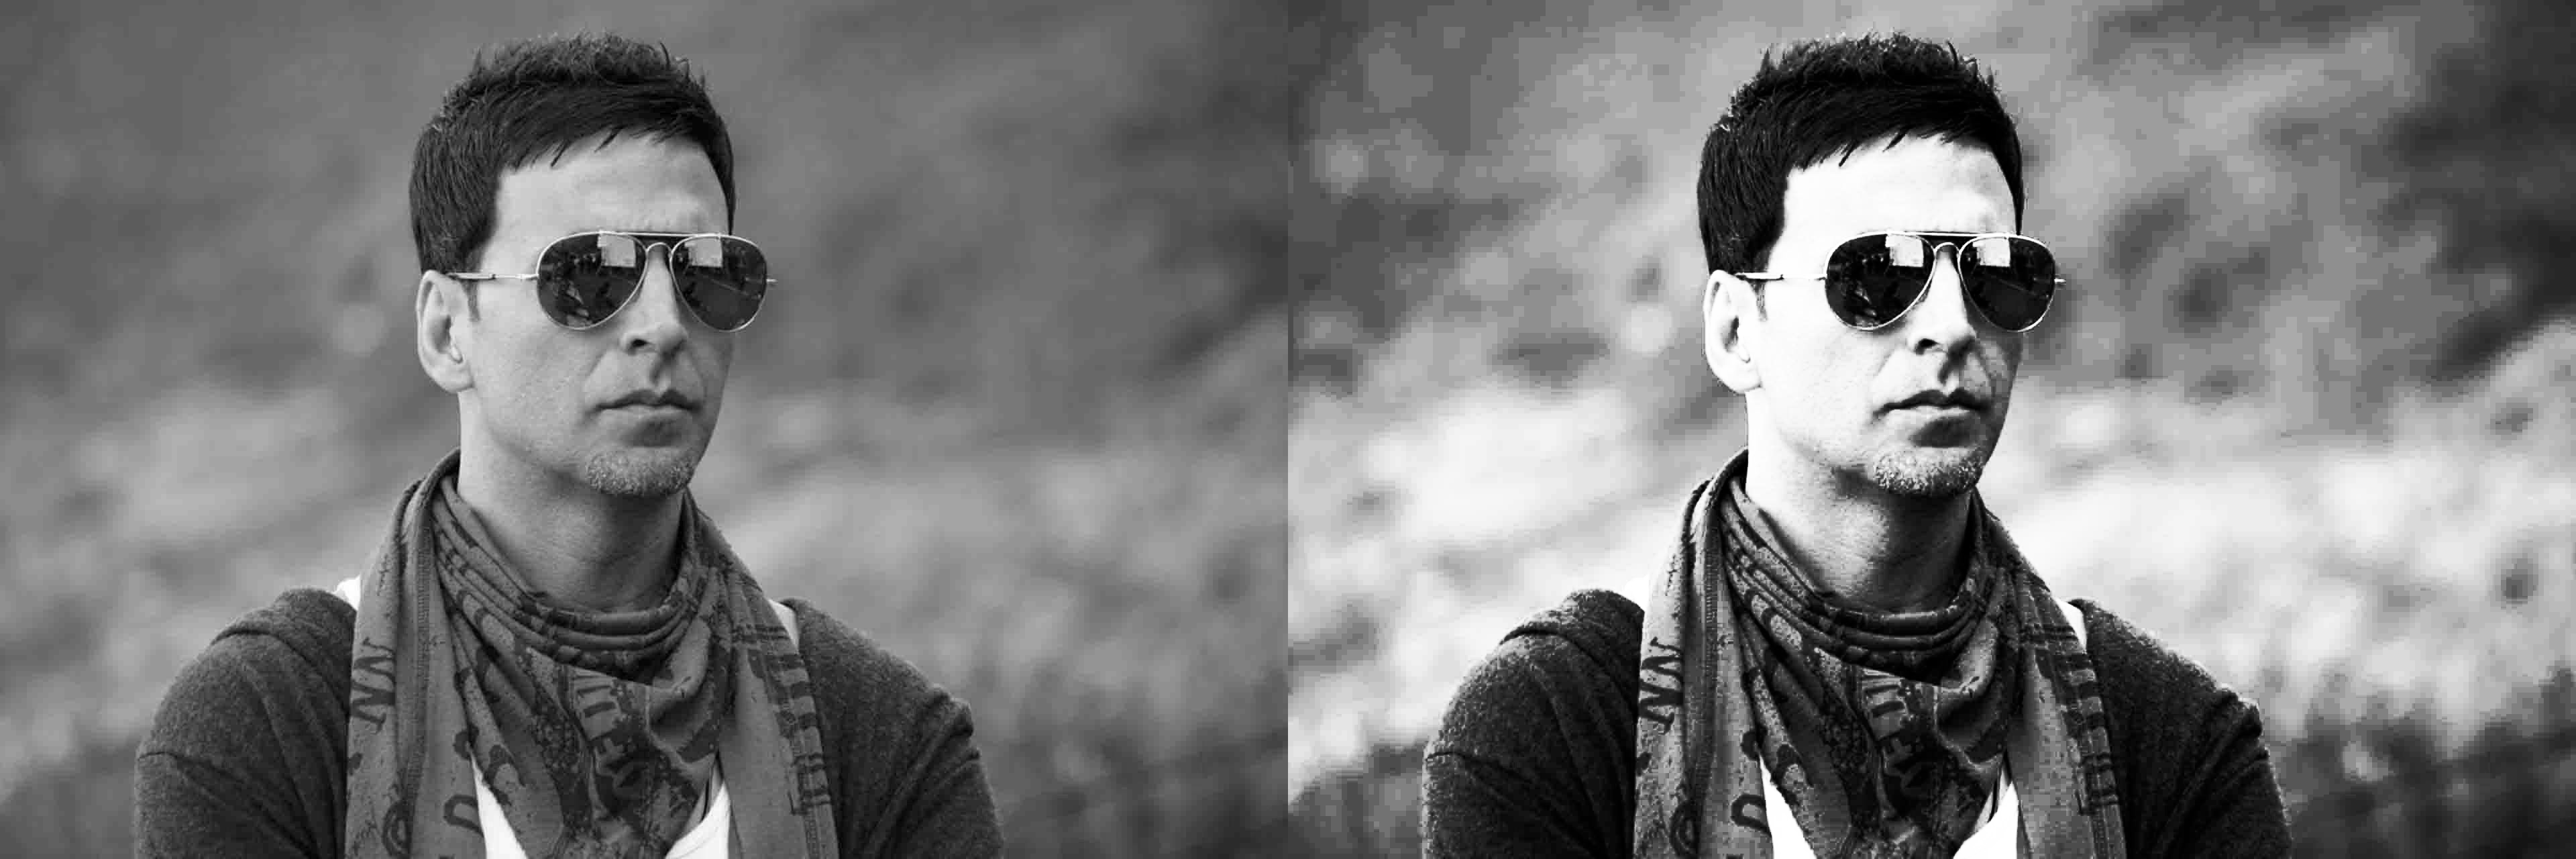

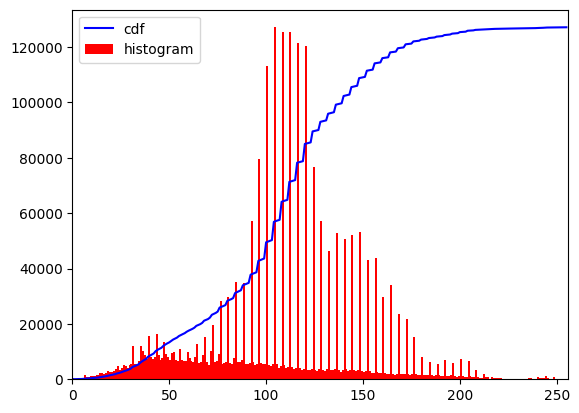

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
img = cv2.imread("/content/hero.jpg",0)
if img is None:
    print('Could not open or find the image:', img)
    exit(0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
#cv2.imwrite('res.png',res)
cv2_imshow(res)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

transform 2 hough line

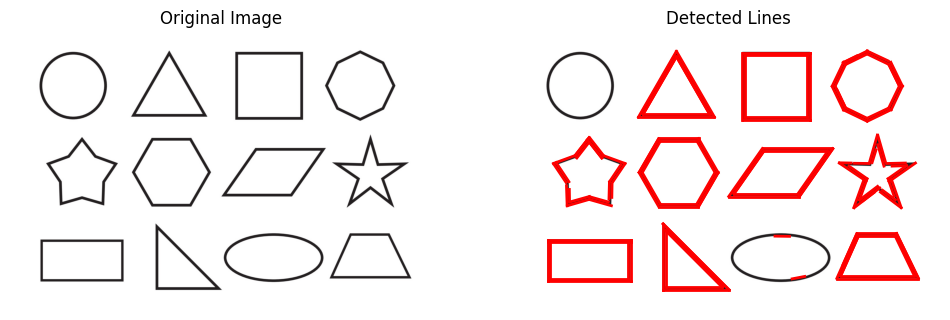

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Sample image filename
image_path = '/content/shape.jpg'  # Make sure the image exists and the path is correct

# Read the image
src = cv2.imread(image_path)
if src is None:
    raise FileNotFoundError(f"File '{image_path}' does not exist. Please check the file path and try again.")

# Convert to grayscale
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(src_gray, 50, 200)

# Perform Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

# Display results in a single figure with subplots
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

# Plot lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

plt.show()

feature detection harris corner


Saving chessboard.jpeg to chessboard.jpeg


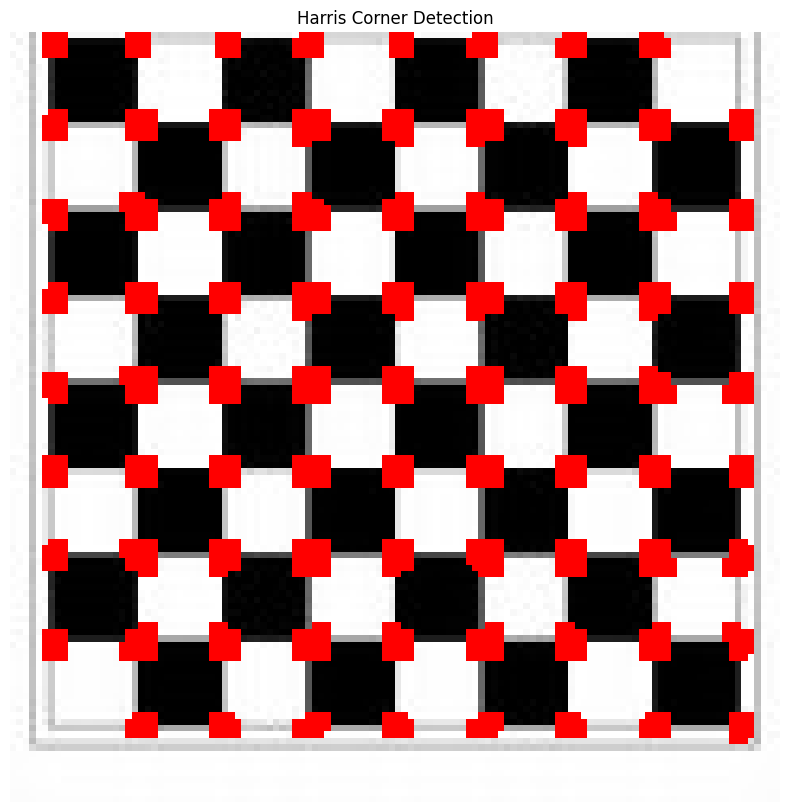

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()

# Get the filename of the uploaded image
filename = next(iter(uploaded))

# Step 2: Load the image
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Detect corners using the Harris Corner Detector
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Step 4: Dilate the corner markers for better visualization
dst = cv2.dilate(dst, None)

# Step 5: Mark the corners on the original image
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Step 6: Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 7: Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

matching and model fitting

Saving download 1 hero.jpeg to download 1 hero (1).jpeg
Saving download 2 hero.jpeg to download 2 hero.jpeg
OpenCV Version: 4.10.0


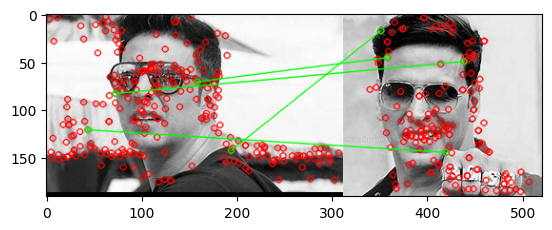

In [ ]:
# Install OpenCV if it's not already installed
!pip install opencv-python-headless

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Assuming the file uploaded is 'hero.jpg'
img1 = cv.imread('download 1 hero.jpeg', cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('download 2 hero.jpeg', cv.IMREAD_GRAYSCALE)  # trainImage

print('OpenCV Version:', cv.__version__)

# Initiate SIFT detector
sift = cv.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # or pass an empty dictionary
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]

# Ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.imshow(img3)
plt.show()


pca

Saving download 1 hero.jpeg to download 1 hero (2).jpeg
Segmented image saved as 'segmented_image.png'
Silhouette Score: 0.6272


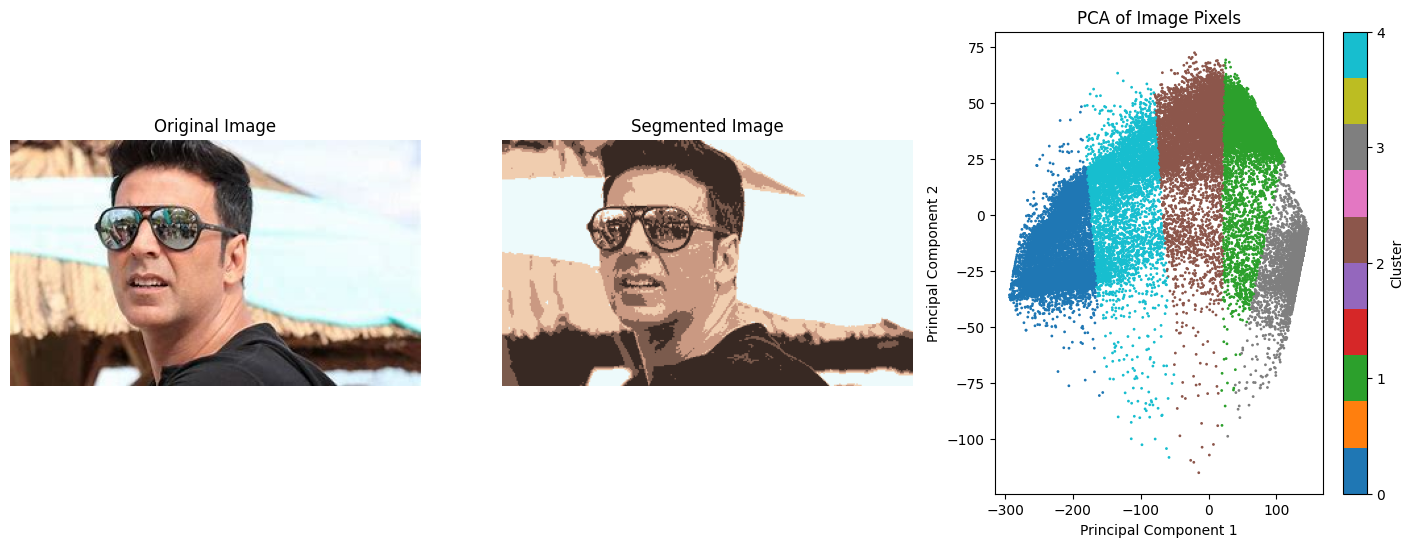

Done


In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files

# Upload the image
uploaded = files.upload()

# Extract the filename from the uploaded files
image_path = list(uploaded.keys())[0]

# Function to perform K-means clustering on image pixels and plot PCA
def kmeans_on_image(image_path, cluster_n):
    # Load the image
    img = cv.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert the image to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Perform K-means clustering
    term_crit = (cv.TERM_CRITERIA_EPS, 30, 0.1)
    _, labels, centers = cv.kmeans(pixel_values, cluster_n, None, term_crit, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convert centers to uint8
    centers = np.uint8(centers)

    # Map the labels to center colors
    segmented_img = centers[labels.flatten()]

    # Reshape segmented image to original dimensions
    segmented_img = segmented_img.reshape(img_rgb.shape)

    # Save the segmented image
    output_filename = "segmented_image.png"  # You can change the file name and format
    segmented_img_bgr = cv.cvtColor(segmented_img, cv.COLOR_RGB2BGR)  # Convert back to BGR for saving
    cv.imwrite(output_filename, segmented_img_bgr)
    print(f"Segmented image saved as '{output_filename}'")

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    pixel_values_pca = pca.fit_transform(pixel_values)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pixel_values, labels.flatten())
    print(f'Silhouette Score: {silhouette_avg:.4f}')


    # Create a scatter plot for PCA
    plt.figure(figsize=(18, 6))

    # Plot the original and segmented images
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_img)
    plt.title('Segmented Image')
    plt.axis('off')

    # Plot PCA results
    plt.subplot(1, 3, 3)
    scatter = plt.scatter(pixel_values_pca[:, 0], pixel_values_pca[:, 1], c=labels.flatten(), cmap='tab10', s=1)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of Image Pixels')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()

    print('Done')

# Number of clusters
cluster_n = 5
kmeans_on_image(image_path, cluster_n)


cnn

Saving download 2 hero.jpeg to download 2 hero (1).jpeg
Image 'download 2 hero (1).jpeg' uploaded successfully.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 90.3MB/s]


Average Confidence Score: 0.9970


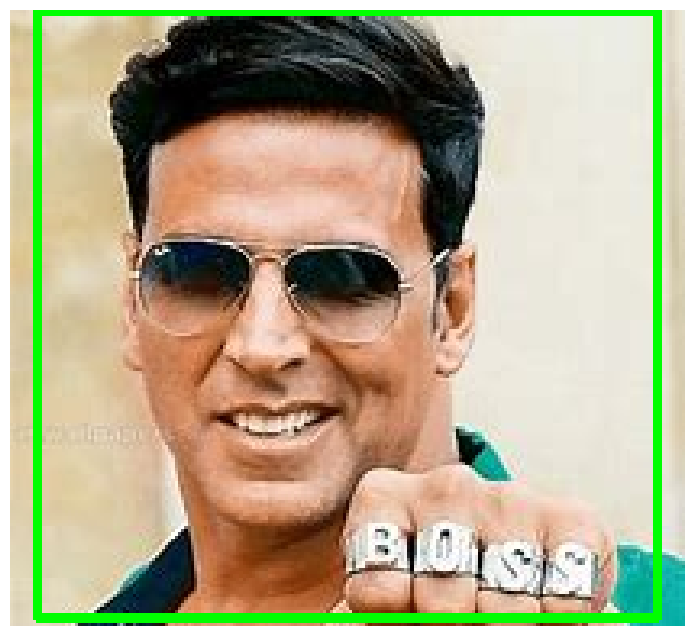

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Load the pre-trained Mask R-CNN model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the function for object detection and accuracy evaluation
def detect_objects(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Transform the image to match model input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get the detected boxes, labels, and scores
    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO dataset labels
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Set a detection threshold (confidence score)
    detection_threshold = 0.7

    # Variables to calculate average score
    detected_scores = []

    # Plot detections on the image
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Append the score to the detected scores list
            detected_scores.append(scores[i])

            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add the label to the bounding box
            label = coco_labels[labels[i]]
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # If objects are detected, calculate average confidence score
    if detected_scores:
        average_score = np.mean(detected_scores)
        print(f"Average Confidence Score: {average_score:.4f}")
    else:
        print("No objects detected above the confidence threshold.")

    # Display the image with detections
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Run the detection on the uploaded image
if image_path:
    detect_objects(image_path)


Saving download 2 hero.jpeg to download 2 hero (2).jpeg
Image 'download 2 hero (2).jpeg' uploaded successfully.
Average Confidence Score: 0.9970


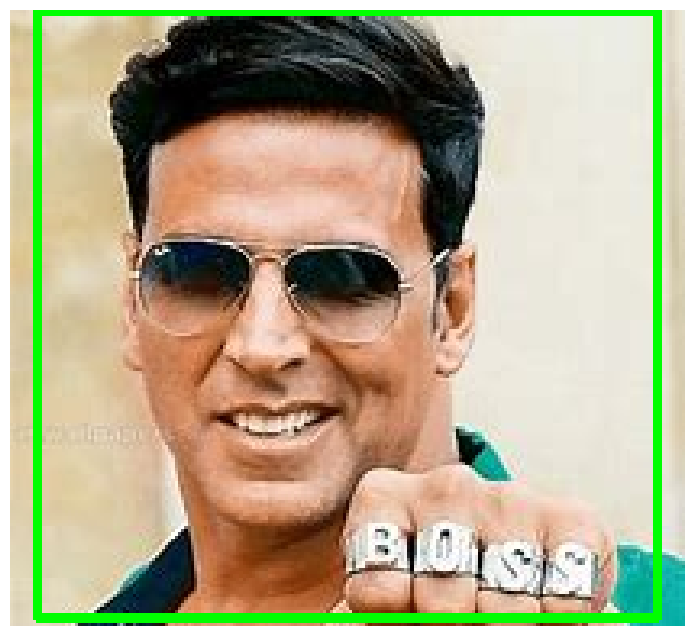

In [ ]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the file name of the uploaded image
image_path = list(uploaded.keys())[0]

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Load the pre-trained Mask R-CNN model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Define the function for object detection and accuracy evaluation
def detect_objects(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Transform the image to match model input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get the detected boxes, labels, and scores
    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO dataset labels
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Set a detection threshold (confidence score)
    detection_threshold = 0.7

    # Variables to calculate average score
    detected_scores = []

    # Plot detections on the image
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Append the score to the detected scores list
            detected_scores.append(scores[i])

            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add the label to the bounding box
            label = coco_labels[labels[i]]
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # If objects are detected, calculate average confidence score
    if detected_scores:
        average_score = np.mean(detected_scores)
        print(f"Average Confidence Score: {average_score:.4f}")
    else:
        print("No objects detected above the confidence threshold.")

    # Display the image with detections
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Run the detection on the uploaded image
if image_path:
    detect_objects(image_path)


Rcnn

Saving download 1 hero.jpeg to download 1 hero (3).jpeg
Saving download 2 hero.jpeg to download 2 hero (3).jpeg
Image 'download 1 hero (3).jpeg' uploaded successfully.
Mask R-CNN Results:
 Precision: 0.0, Recall: [0.], mAP: 0.0


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 67.7MB/s]


Faster R-CNN Results:
 Precision: 0.0, Recall: [0.], mAP: 0.0


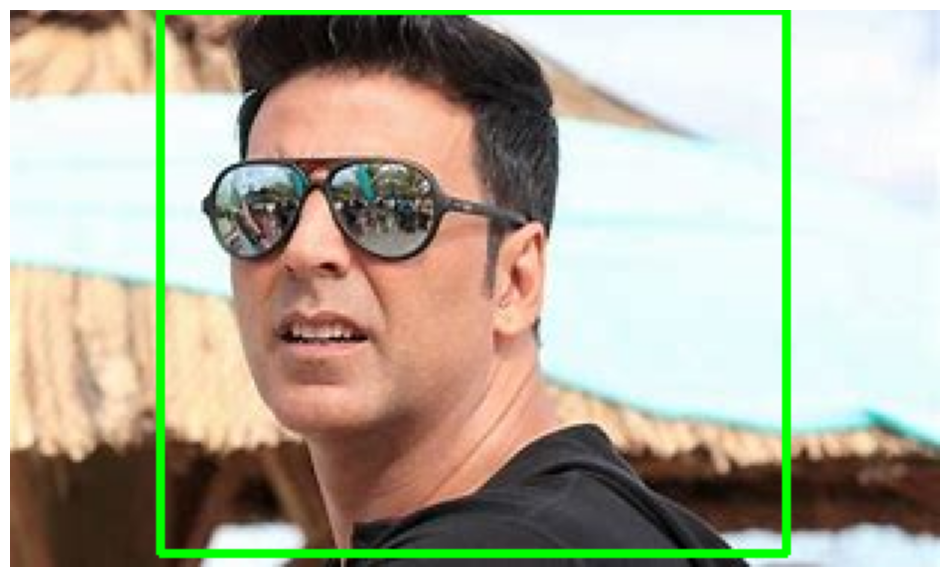

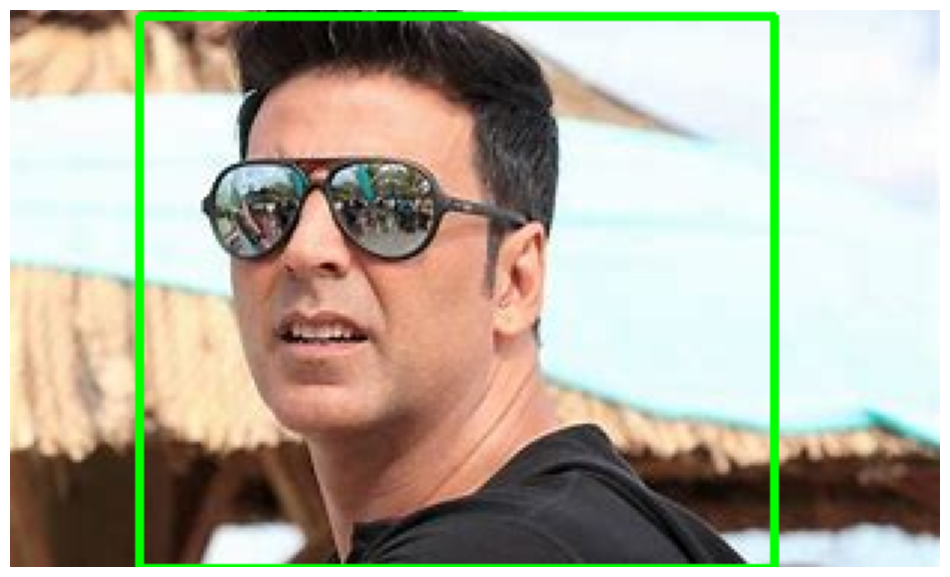

In [ ]:
# Step 1: Import Libraries
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
from torchvision.ops import box_iou
import matplotlib.pyplot as plt
from google.colab import files
import pycocotools.mask as mask_util

# Step 2: Upload Image File
uploaded = files.upload()

# Step 3: Get the Uploaded File Name
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Step 4: Define a function to compute IoU (Intersection over Union)
def compute_iou(boxes1, boxes2):
    ious = box_iou(torch.tensor(boxes1), torch.tensor(boxes2))
    return ious.numpy()  # Remove extra indentation and fix return

# Step 5: Define function to evaluate precision, recall, and mAP
def evaluate_model(model, image_path, ground_truth_boxes, ground_truth_labels, detection_threshold=0.7):
    # Read and transform the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get detected boxes, labels, and scores
    detected_boxes = output[0]['boxes'].numpy()
    detected_labels = output[0]['labels'].numpy()
    detected_scores = output[0]['scores'].numpy()

    # Filter detections based on the score threshold
    detected_boxes = detected_boxes[detected_scores > detection_threshold]
    detected_labels = detected_labels[detected_scores > detection_threshold]

    # Compute IoU
    ious = compute_iou(ground_truth_boxes, detected_boxes)

    # Set IoU threshold (e.g., 0.5 for loose or 0.75 for stricter evaluation)
    iou_threshold = 0.5
    correct_detections = ious > iou_threshold

    # Compute precision and recall
    precision = np.mean(correct_detections)
    recall = np.mean(correct_detections, axis=0)

    # Compute mAP (optional: simple version based on precision and recall)
    mAP = np.mean(precision)  # Simplified, for detailed mAP you can use pycocotools

    return precision, recall, mAP, detected_boxes, detected_labels

# Step 6: Ground truth boxes and labels (replace this with your own data)
# Example ground truth (Replace with your dataset)
ground_truth_boxes = [[2200, 765, 2545, 878],
                      [26, 0, 1098, 776],
                      [360, 428, 660, 787],
                      [1056, 715, 2111, 872],
                      [968, 134, 2213, 864],
                      [1069, 110, 2124, 848],
                      [1634, 441, 1666, 468],
                      [1600, 450, 1625, 468]]
ground_truth_labels = [77, 64, 86, 76, 73, 72, 3, 3]

# Step 7: Evaluate Mask R-CNN
maskrcnn_model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
maskrcnn_model.eval()

precision_maskrcnn, recall_maskrcnn, mAP_maskrcnn, boxes_maskrcnn, labels_maskrcnn = evaluate_model(
    maskrcnn_model, image_path, ground_truth_boxes, ground_truth_labels)

print(f"Mask R-CNN Results:\n Precision: {precision_maskrcnn}, Recall: {recall_maskrcnn}, mAP: {mAP_maskrcnn}")

# Step 8: Evaluate Faster R-CNN
fasterrcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
fasterrcnn_model.eval()

precision_fasterrcnn, recall_fasterrcnn, mAP_fasterrcnn, boxes_fasterrcnn, labels_fasterrcnn = evaluate_model(
    fasterrcnn_model, image_path, ground_truth_boxes, ground_truth_labels)

print(f"Faster R-CNN Results:\n Precision: {precision_fasterrcnn}, Recall: {recall_fasterrcnn}, mAP: {mAP_fasterrcnn}")

# Step 9: Plot the detections (Optional)
def plot_detections(image_path, detected_boxes, detected_labels, coco_labels):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for i in range(len(detected_boxes)):
        (x1, y1, x2, y2) = detected_boxes[i].astype(int)
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = coco_labels[detected_labels[i]]
        cv2.putText(image_rgb, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Define COCO labels for visualization
coco_labels = [
    '_background_', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
    'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase',
    'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
    'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
    'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A',
    'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Plot the detections for Mask R-CNN and Faster R-CNN
plot_detections(image_path, boxes_maskrcnn, labels_maskrcnn, coco_labels)
plot_detections(image_path, boxes_fasterrcnn, labels_fasterrcnn, coco_labels)
